In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('C:\Machine Learning\mylib' )
import kNN, NaiveBayes, Classification_metrix
import matplotlib.pyplot as plt
import sklearn.metrics as m

Задание 1

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
df = pd.DataFrame(data, columns=['weather', 'stroll'])
df

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [3]:
p_rain_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_stroll_if_rain = (p_stroll*p_rain_if_stroll)/p_rain
print(p_stroll_if_rain)

0.3333333333333333


Задание 2

In [4]:
df = pd.read_csv('../datasets/csgo_task_pred.csv')
print(df["bomb_planted"].value_counts())

0    108537
1     13662
Name: bomb_planted, dtype: int64


Проводим балансировку классов

In [5]:
bomb_planted = df[df["bomb_planted"] == 1]
bomb_not_planted  = df[df["bomb_planted"] == 0]
from sklearn.utils import resample
bomb_not_planted = resample(bomb_not_planted,
             replace=True,
             n_samples=len(bomb_planted),
             random_state=42)
bomb_not_planted.shape

(13662, 24)

In [6]:
df1 = pd.concat([bomb_not_planted, bomb_planted])

In [7]:
y = df1["bomb_planted"]
X = df1.drop(["bomb_planted"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Проводим масштабирование признаков

после масштабирования результаты везде кроме SVM и naiveBayes очень хорошо возросли

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_train))
X_test_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_test))

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1)
knn.fit(X_train_minmax, y_train)
y_knn_pred = knn.predict(X_test_minmax)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2753
           1       0.87      0.94      0.91      2712

    accuracy                           0.90      5465
   macro avg       0.91      0.90      0.90      5465
weighted avg       0.91      0.90      0.90      5465



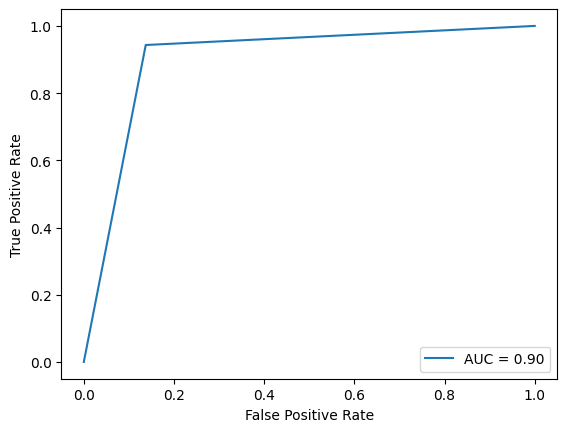

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn_pred))

fpr, tpr, thresholds = m.roc_curve(y_test, y_knn_pred)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2753
           1       0.89      0.92      0.90      2712

    accuracy                           0.90      5465
   macro avg       0.90      0.90      0.90      5465
weighted avg       0.90      0.90      0.90      5465



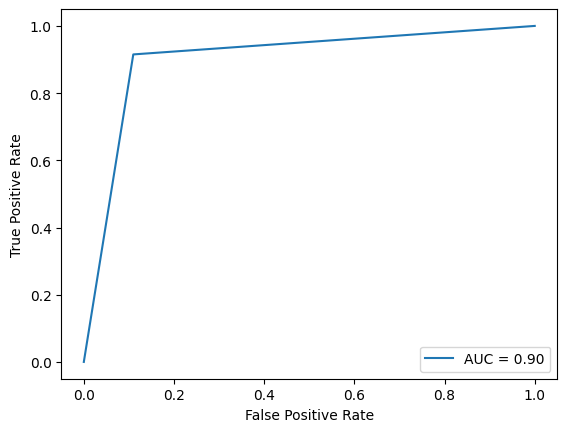

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_minmax, y_train)
y_pred = gnb.predict(X_test_minmax)
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = m.roc_curve(y_test, y_pred)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      2753
           1       0.91      0.97      0.94      2712

    accuracy                           0.94      5465
   macro avg       0.94      0.94      0.94      5465
weighted avg       0.94      0.94      0.94      5465



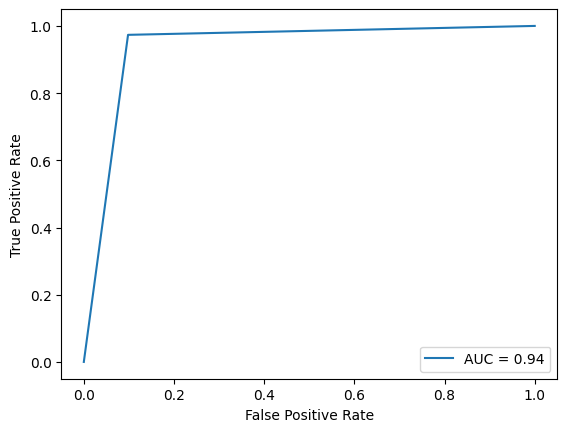

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, C=0.5).fit(X_train_minmax, y_train)
y_pred1 = clf.predict(X_test_minmax)
print(classification_report(y_test, y_pred1))

fpr, tpr, thresholds = m.roc_curve(y_test, y_pred1)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2753
           1       0.91      0.98      0.94      2712

    accuracy                           0.94      5465
   macro avg       0.94      0.94      0.94      5465
weighted avg       0.94      0.94      0.94      5465



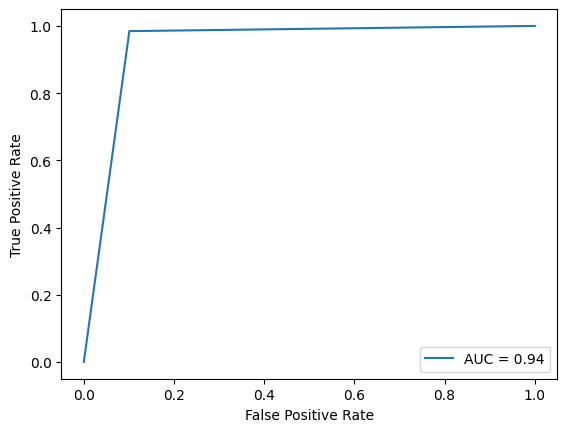

In [14]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_minmax, y_train)
y_pred2 = clf.predict(X_test_minmax)
print(classification_report(y_test, y_pred2))

fpr, tpr, thresholds = m.roc_curve(y_test, y_pred2)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Задание 3

kNN

In [15]:
model = kNN.kNN(5,1,2)
df1 = df1.sample(n=1000)
y1 = df1["bomb_planted"]
X1 = df1.drop(["bomb_planted"], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax1 = min_max_scaler.fit_transform(X_train1)
X_test_minmax1 = min_max_scaler.fit_transform(X_test1)
y_train1= np.array(y_train1, dtype=np.float64)
model.fit(X_train_minmax1, y_train1)
y_pred3 = model.predict(X_test_minmax1)
print(classification_report(y_test1, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       103
           1       0.85      0.95      0.90        97

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



In [17]:
print(Classification_metrix.acurracy(y_test1, y_pred3))
print(Classification_metrix.precision(y_test1, y_pred3))
print(Classification_metrix.recall(y_test1, y_pred3))
print(Classification_metrix.f1(y_test1, y_pred3))

0.895
0.8518518518518519
0.9484536082474226
0.8975609756097561


NaiveBayes

In [22]:
model = NaiveBayes.NaiveBayes()
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2753
           1       0.89      0.92      0.90      2712

    accuracy                           0.90      5465
   macro avg       0.90      0.90      0.90      5465
weighted avg       0.90      0.90      0.90      5465



In [23]:
print(Classification_metrix.acurracy(y_test, y_pred4))
print(Classification_metrix.precision(y_test, y_pred4))
print(Classification_metrix.recall(y_test, y_pred4))
print(Classification_metrix.f1(y_test, y_pred4))

0.9026532479414455
0.8915229885057471
0.9151917404129793
0.9032023289665211
